Epoch 1/20
134999/134999 [==============================] - 0s - loss: 0.6363 - acc: 0.9057     
Epoch 2/20
134999/134999 [==============================] - 0s - loss: 0.5679 - acc: 0.9332     
Epoch 3/20
134999/134999 [==============================] - 0s - loss: 0.4893 - acc: 0.9332     
Epoch 4/20
134999/134999 [==============================] - 0s - loss: 0.4109 - acc: 0.9332     
Epoch 5/20
134999/134999 [==============================] - 0s - loss: 0.3416 - acc: 0.9332     
Epoch 6/20
134999/134999 [==============================] - 0s - loss: 0.2902 - acc: 0.9332     
Epoch 7/20
134999/134999 [==============================] - 0s - loss: 0.2598 - acc: 0.9332     
Epoch 8/20
134999/134999 [==============================] - 0s - loss: 0.2457 - acc: 0.9332     
Epoch 9/20
134999/134999 [==============================] - 0s - loss: 0.2378 - acc: 0.9332     
Epoch 10/20
134999/134999 [==============================] - 0s - loss: 0.2317 - acc: 0.9332     
Epoch 11/20
134999/134999 [==

135000/135000 [==============================] - 0s - loss: 0.4711 - acc: 0.9331     
Epoch 3/20
135000/135000 [==============================] - 0s - loss: 0.3602 - acc: 0.9332     
Epoch 4/20
135000/135000 [==============================] - 0s - loss: 0.2893 - acc: 0.9332     
Epoch 5/20
135000/135000 [==============================] - 0s - loss: 0.2602 - acc: 0.9332     
Epoch 6/20
135000/135000 [==============================] - 0s - loss: 0.2484 - acc: 0.9332     
Epoch 7/20
135000/135000 [==============================] - 0s - loss: 0.2407 - acc: 0.9332     
Epoch 8/20
135000/135000 [==============================] - 0s - loss: 0.2346 - acc: 0.9332     
Epoch 9/20
135000/135000 [==============================] - 0s - loss: 0.2291 - acc: 0.9332     
Epoch 10/20
135000/135000 [==============================] - 0s - loss: 0.2243 - acc: 0.9332     
Epoch 11/20
135000/135000 [==============================] - 0s - loss: 0.2200 - acc: 0.9332     
Epoch 12/20
135000/135000 [============

135001/135001 [==============================] - 0s - loss: 0.5955 - acc: 0.9198     
Epoch 4/20
135001/135001 [==============================] - 0s - loss: 0.5145 - acc: 0.9330     
Epoch 5/20
135001/135001 [==============================] - 0s - loss: 0.4353 - acc: 0.9332     
Epoch 6/20
135001/135001 [==============================] - 0s - loss: 0.3569 - acc: 0.9331     
Epoch 7/20
135001/135001 [==============================] - 0s - loss: 0.2927 - acc: 0.9331     
Epoch 8/20
135001/135001 [==============================] - 0s - loss: 0.2606 - acc: 0.9333     
Epoch 9/20
135001/135001 [==============================] - 0s - loss: 0.2470 - acc: 0.9333     
Epoch 10/20
135001/135001 [==============================] - 0s - loss: 0.2389 - acc: 0.9333     
Epoch 11/20
135001/135001 [==============================] - 0s - loss: 0.2332 - acc: 0.9333     
Epoch 12/20
135001/135001 [==============================] - 0s - loss: 0.2285 - acc: 0.9333     
Epoch 13/20
135001/135001 [===========

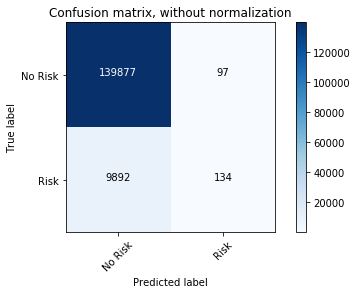

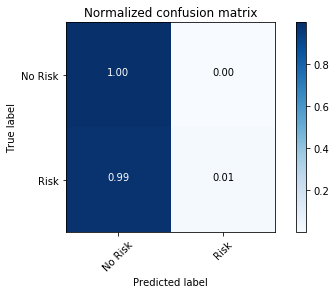

0.50633613225443252

In [4]:
import keras as ks
import matplotlib.pyplot as plt
import itertools
#import pandas_ml as pdml

import pandas as pd
import numpy as np
from numpy.linalg import norm, svd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import optimizers
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
#from imblearn.under_sampling import ClusterCentroids                                                                 




#Random initialization
seed = 7
np.random.seed(seed)

#function definition

def generate_results(y_test, y_score):
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.show()
    print('AUC: %f' % roc_auc)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    #This function prints and plots the confusion matrix.
    #Normalization can be applied by setting `normalize=True`.
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def pcaAnalysis(X, lmbda=.01, tol=1e-3,maxiter=100, verbose=True):
    
    Y = X
    norm_two = norm(Y.ravel(), 2)
    norm_inf = norm(Y.ravel(), np.inf) / lmbda
    dual_norm = np.max([norm_two, norm_inf])
    Y = Y / dual_norm
    A = np.zeros(Y.shape)
    E = np.zeros(Y.shape)
    dnorm = norm(X, 'fro')
    mu = 1.25 / norm_two
    rho = 1.5
    sv = 10.
    n = Y.shape[0]
    itr = 0
    while True:
        Eraw = X - A + (1 / mu) * Y
        Eupdate = np.maximum(Eraw - lmbda / mu, 0) + np.minimum(Eraw + lmbda / mu, 0)
        U, S, V = svd(X - Eupdate + (1 / mu) * Y, full_matrices=False)
        svp = (S > 1 / mu).shape[0]
        if svp < sv:
            sv = np.min([svp + 1, n])
        else:
            sv = np.min([svp + round(.05 * n), n])
        Aupdate = np.dot(np.dot(U[:, :svp], np.diag(S[:svp] - 1 / mu)), V[:svp, :])
        A = Aupdate
        E = Eupdate
        Z = X - A - E
        Y = Y + mu * Z
        mu = np.min([mu * rho, mu * 1e7])
        itr += 1
        if ((norm(Z, 'fro') / dnorm) < tol) or (itr >= maxiter):
            break
    if verbose:
        print("Finished at iteration %d" % (itr))  
    return A, E

def neural_network():
    model = Sequential()
    #model.add(Dropout(0.5, input_shape=(10,)))
    model.add(Dense(12, input_dim=10, activation='relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(6, activation='relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(6, activation='relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

    #model.fit(X_train, y_train, epochs=50, batch_size=10)
    
    return model

#Initialization
dataTrain = pd.read_csv('cs-training.csv').drop('Unnamed: 0', axis = 1)
dataTest = pd.read_csv('cs-test.csv').drop('Unnamed: 0', axis = 1)

targetTrain = dataTrain['SeriousDlqin2yrs']
targetTest = dataTest['SeriousDlqin2yrs']

dataTrain = dataTrain.drop(['SeriousDlqin2yrs'],axis=1)
dataTest = dataTest.drop(['SeriousDlqin2yrs'],axis=1)


#Preprocessing

dataTrain = dataTrain.fillna(0.0)
dataTest = dataTest.fillna(0.0)

#sampler = ClusterCentroids(ratio='majority', random_state=42, n_jobs=-1) 
#dataTrain = sampler.fit_sample(dataTrain,targetTrain)
#print(dataTrain.target.value_counts())
#scaler = StandardScaler()
#dataTrainNormalized = scaler.fit_transform(dataTrain)
#dataTestNormalized = scaler.fit_transform(dataTest)

#PCA
#dataTrainPCA = np.array(dataTrainNormalized)
#dataTestPCA = np.array(dataTestNormalized)

#pca = PCA(n_components=8)
#pca.fit(dataTrainPCA)
#PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
#  svd_solver='auto', tol=0.0, whiten=False)

#print(pca.transform(dataTrainPCA))
#print(dataTrainPCA)
#print(dataTestPCA)
#print(np.shape(dataTestPCA))
#print(np.shape(dataTrainPCA))
#sz = 8
#C, D = pcaAnalysis(dataTrainPCA[:,:sz])
#dataTrainPCA = C+D
#C, D = pcaAnalysis(dataTestPCA[:,:sz])
#dataTestPCA = C+D
#print(np.shape(dataTestPCA))
#print(np.shape(dataTrainPCA))
#print(np.shape(dataTestPCA))
#print(np.shape(dataTestPCA))

#Cross validation data split
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(dataTrainNormalized, targetTrain, test_size=0.4, random_state=0)

#K fold validation
#from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection

#kfold = model_selection.KFold(n_splits=10, random_state=seed)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
# Neural Net Dropout

from keras.wrappers.scikit_learn import KerasClassifier

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=neural_network, epochs=20, batch_size=5000, verbose=1)))
pipeline = Pipeline(estimators)


#Evaluation
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

scores = cross_val_predict(pipeline, dataTrain, targetTrain, cv=kfold)
#scores = model.evaluate(X_train, y_train)
cnf_matrix = confusion_matrix(targetTrain,scores)
np.set_printoptions(precision=2)
class_names= ['No Risk','Risk']

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))